In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
fifa17_raw_data = pd.read_csv("data/FIFA17_official_data.csv")
fifa18_raw_data = pd.read_csv("data/FIFA18_official_data.csv")
fifa19_raw_data = pd.read_csv("data/FIFA19_official_data.csv")
fifa20_raw_data = pd.read_csv("data/FIFA20_official_data.csv")
fifa21_raw_data = pd.read_csv("data/FIFA21_official_data.csv")

old_raw_data = pd.concat([fifa17_raw_data, fifa18_raw_data, fifa19_raw_data, fifa20_raw_data, fifa21_raw_data], ignore_index=True)
old_raw_data.shape

(87642, 65)

In [26]:
old_raw_data.drop(old_raw_data[old_raw_data["Position"] == "GK"].index, inplace=True)
old_raw_data = old_raw_data.drop(["Photo", "Flag", "Club Logo", "Special", "International Reputation", "Body Type", "Real Face", "Joined",
                                  "Loaned From","Contract Valid Until", "Release Clause", "Best Position", "Best Overall Rating", "Potential",
                                  "ID", "Name", "Nationality", "Club", "Value", "Wage", "Preferred Foot", "Weak Foot", "Skill Moves",
                                  "Work Rate", "Jersey Number", "Height", "Weight", "Position", "Age", "Marking", "GKDiving", "GKHandling",
                                  "GKKicking", "GKPositioning", "GKReflexes", "DefensiveAwareness"],
                                 axis=1, inplace=False)
old_raw_data.dropna(inplace=True)
old_raw_data.shape

(86935, 29)

In [27]:
bins = [-1, 64, 74, 100]
labels = ["Bronze", "Silver", "Gold"]
old_raw_data["Rank"] = pd.cut(old_raw_data["Overall"], bins=bins, labels=labels, include_lowest=True)
old_raw_data = old_raw_data.drop(["Overall"], axis=1, inplace=False)

old_raw_data

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,Rank
0,77.0,94.0,77.0,83.0,88.0,86.0,86.0,84.0,64.0,91.0,...,86.0,78.0,41.0,92.0,84.0,85.0,83.0,45.0,38.0,Gold
1,73.0,76.0,59.0,84.0,75.0,80.0,73.0,68.0,81.0,85.0,...,86.0,88.0,86.0,88.0,76.0,63.0,85.0,85.0,88.0,Gold
2,76.0,77.0,81.0,84.0,78.0,76.0,76.0,68.0,82.0,83.0,...,85.0,91.0,89.0,80.0,80.0,84.0,86.0,89.0,84.0,Gold
3,82.0,63.0,75.0,83.0,68.0,79.0,78.0,83.0,80.0,83.0,...,83.0,69.0,85.0,77.0,78.0,80.0,79.0,83.0,83.0,Gold
4,78.0,71.0,73.0,85.0,84.0,89.0,84.0,82.0,88.0,90.0,...,87.0,72.0,70.0,84.0,87.0,76.0,83.0,73.0,73.0,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87637,14.0,5.0,13.0,24.0,5.0,14.0,13.0,12.0,15.0,11.0,...,5.0,23.0,12.0,7.0,31.0,11.0,29.0,11.0,13.0,Bronze
87638,8.0,9.0,11.0,23.0,7.0,11.0,11.0,11.0,17.0,14.0,...,8.0,21.0,4.0,5.0,21.0,7.0,24.0,12.0,10.0,Bronze
87639,10.0,7.0,10.0,17.0,8.0,6.0,13.0,10.0,19.0,16.0,...,7.0,19.0,10.0,6.0,12.0,13.0,30.0,10.0,11.0,Bronze
87640,10.0,7.0,11.0,19.0,7.0,10.0,13.0,10.0,18.0,12.0,...,6.0,18.0,9.0,6.0,21.0,14.0,20.0,10.0,10.0,Bronze


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X = old_raw_data.drop("Rank", axis=1)
y = old_raw_data["Rank"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = rfc.predict(X_test)

rfc_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rfc_accuracy: .2f}")

print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy:  0.93
Classification report:
              precision    recall  f1-score   support

      Bronze       0.94      0.94      0.94      6775
        Gold       0.94      0.90      0.92      2105
      Silver       0.93      0.94      0.93      8507

    accuracy                           0.93     17387
   macro avg       0.94      0.93      0.93     17387
weighted avg       0.93      0.93      0.93     17387


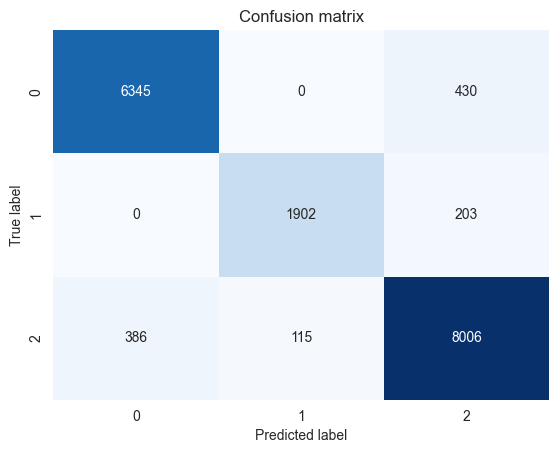

In [31]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix")
plt.show();

In [32]:
pred_data = pd.read_csv("data/FIFA22_official_data.csv")

pred_data.drop(pred_data[pred_data["Position"] == "GK"].index, inplace=True)
pred_data = pred_data.drop(["Photo", "Flag", "Club Logo", "Special", "International Reputation", "Body Type", "Real Face", "Joined",
                                  "Loaned From","Contract Valid Until", "Release Clause", "Best Position", "Best Overall Rating", "Potential",
                                  "ID", "Name", "Nationality", "Club", "Value", "Wage", "Preferred Foot", "Weak Foot", "Skill Moves",
                                  "Work Rate", "Jersey Number", "Height", "Weight", "Position", "Age", "Marking", "GKDiving", "GKHandling",
                                  "GKKicking", "GKPositioning", "GKReflexes", "DefensiveAwareness"],
                                 axis=1, inplace=False)
pred_data.dropna(inplace=True)

pred_data["Rank"] = pd.cut(pred_data["Overall"], bins=bins, labels=labels, include_lowest=True)
pred_data = pred_data.drop(["Overall"], axis=1, inplace=False)

X_pred = pred_data.drop("Rank", axis=1)
labels = pred_data["Rank"]

In [33]:
y_pred = rfc.predict(X_pred)

rfc_accuracy = accuracy_score(labels, y_pred)
print(f"Accuracy: {rfc_accuracy: .2f}")

print("Classification report:")
print(classification_report(labels, y_pred))

Accuracy:  0.93
Classification report:
              precision    recall  f1-score   support

      Bronze       0.93      0.91      0.92      5126
        Gold       0.91      0.92      0.92      2265
      Silver       0.93      0.94      0.94      9068

    accuracy                           0.93     16459
   macro avg       0.93      0.92      0.93     16459
weighted avg       0.93      0.93      0.93     16459


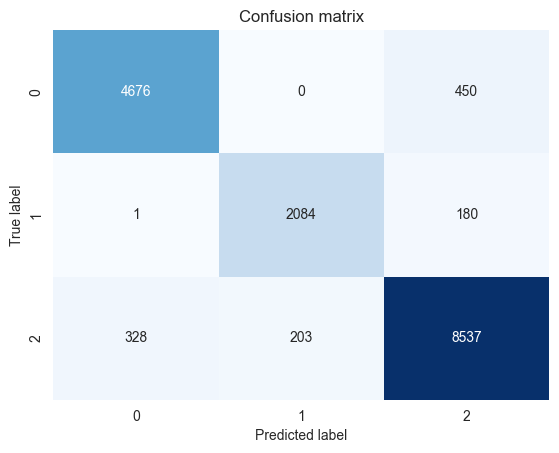

In [34]:
conf_matrix = confusion_matrix(labels, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix")
plt.show();